## 
### ABOUT
About the company
In 2016, Cyclistic is a company wwhich successfully launched a bike-share offering program that has grown into a fleet of 5,824 bicycles operating in a network of 692 stations. 
Cyclistic's marketing plan has always focused on growing brand awareness and appealing to a larger consumer demographic through various approaches such asits flexible pricing strategy. There are three major pricing categories namely single ride pass, full day ride pass and annual membership. Customers who purchase the first two categories are reffered toas casual riders while those who opt for the latter are called members. 
The recommendation of the finance analyst is that Cyclistic's annual members are much more profitable than the casual riders. Although the pricing flexibility attracts a growig customer base, Moreno is convinced that an increase in the number of annual members will be key to future growth. A marketing campaign is targeted at converting casual riders to annual members rather than targeting newer audiences. There is the belief that it is a much more effective strategy as there is already an awareness among casual rider of the different pricing packages. Futhermore, casual riders have a prference for Cyclistic 

#### BUSINESS OBJECTIVE

The business goal is to design a marketing plan with with the aim of convertingcasual ridersinto annual members. To follow through with the objective, I will be assessing the behaviors of both customer group, identifying trends andmaking recommendations.

#### DATA

For this project, I will be working with 12 months of data spanning  form April 2021 to March 2022. This data is owned by Motivate International Incand I have also been granted non exclusive, royalty free, limited, perpertual license to access, reproduce, analyze, copy, modify, distribute in my product or service and use the Data for any lawful purpose (“License”).

There are no issues of bias or credibility with these datasets. They are Reliable, Original, Comprehensive, Current and Cited.
For this project, I will be working with Python and Jupyter Notebook as my preffered tools

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

In [35]:
# importing data into jupyter lab notebook

bike_1 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202104-BIKe.csv')
bike_2 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202105-BIKe.csv')
bike_3 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202106-BIKe.csv')
bike_4 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202107-BIKe.csv')
bike_5 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202108-BIKe.csv')
bike_6 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202109-BIKe.csv')
bike_7 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202110-BIKe.csv')
bike_8 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202111-BIKe.csv')
bike_9 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202112-BIKe.csv')
bike_10 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202201-BIKe.csv')
bike_11 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202202-BIKe.csv')
bike_12 = pd.read_csv('C:/Users/Master/Documents/ANALYTICS PROJECT PORTOLIO/CYCLIST CASE STUDY/202203-BIKe.csv')

In [36]:
# merging dataset

bikes = pd.concat([bike_1, bike_2, bike_3, bike_4, bike_5, bike_6, bike_7, bike_8, bike_9, bike_10, bike_11, bike_12]).reset_index(drop=True)


The merged dataset contain a total of **5723532** entries and **13** columns. After importing and merging the datasets, I check the data structure for duplicate entries, missig values, wrong data type and other inconsistensies.

In [46]:
# checking data structure and type
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4641395 entries, 0 to 4641394
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   bike_type           object        
 2   start_date          datetime64[ns]
 3   end_date            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  customer_type       object        
 13  days                object        
 14  month               object        
 15  trip_duration       int32         
dtypes: datetime64[ns](2), float64(4), int32(1), object(9)
memory usage: 548.9+ MB


In [38]:
# checking for missing values in each column

bikes.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
start_station_id      745373
end_station_name      796247
end_station_id        796247
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
dtype: int64

In [39]:
# checking for duplicates

new_bike = ~ bikes.duplicated()
bikes = bikes[new_bike]

I observe some inconsistencies with the data. Firstly some columns such as the **end_station_id**, **start_station_id**, **end_station_name** and **start_station_name** have over 700000 missing records while the **end_lang** and **end_lat** have 4716 missing values. Due to the total number rows, I will be able to remove rows with missing values without affecting my ananlysis. Additionally, the **started_at** and **ended_at** which are both timestamps are in the wrong data format. I will convert the data type then split the time and date into seperate columns. Finally some column names are a little bit ambiguous. I will be renaming them for ease of identification

In [40]:
# deleting rows with NA values

bikes = bikes.dropna().reset_index(drop=True)


In [41]:
# converting timestamp to datetime format

bikes['started_at'] = pd.to_datetime(bikes['started_at'])
bikes['ended_at'] = pd.to_datetime(bikes['ended_at'])


In [42]:
# renaming columns for ease of identification

bikes.rename(columns={'rideable_type':'bike_type','started_at':'start_date','ended_at':'end_date', 'member_casual':'customer_type'}, inplace=True)

Now the dataset is clean, I will be adding some new columns which will be derived from the dataset. In order to carry out the exploratory part of his project, I will be adding a trip duration, days and month column. However, before i do that, i will be renaming the variables in the **customer_type** column. casual will be renamed casual riders while **member** will be renamed subscribers

In [137]:
# adding new columns

bikes['days'] = bikes.start_date.dt.day_name()
bikes['month'] = bikes.start_date.dt.month_name()
tsecs = (bikes['end_date'] - bikes['start_date']).dt.total_seconds()
bikes['trip_duration'] = tsecs/60
bikes['trip_duration'] = bikes['trip_duration'].astype(int)

In [138]:
bikes["customer_type"].replace({"member":"subscriber", "customer":"casual riders"}, inplace=True)

#### DATA EXPLORATION AND VISUALIZATION

Our primary objective is to understand he behavior of casual riders and also provide recommendations that would see them turn into subscribers (annual membership plan)

In [149]:
# mean daily average trips of casual riders

casual = bikes['customer_type'] == "casual"
casual_riders = bikes[casual]
mean_daily_trip = casual_riders.groupby('days').agg(mean_trip_duration=('trip_duration', 'mean'))

sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
mean_daily_trip['day_id'] = mean_daily_trip.index
mean_daily_trip['day_id'] = mean_daily_trip['day_id'].map(sorterIndex)
mean_daily_trip.sort_values('day_id', inplace=True)
mean_daily_trip

,mean_trip_duration,day_id
days,,
Sunday,36.733889,0
Monday,31.419566,1
Tuesday,27.584112,2
Wednesday,27.664562,3
Thursday,27.420172,4
Friday,30.090041,5
Saturday,33.810345,6


Text(0, 0.5, 'average trip duration')

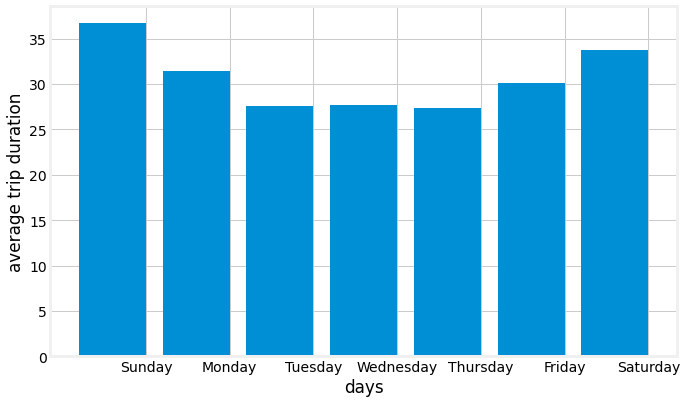

In [141]:
# plotting the graph of 

fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
 
ax.bar(mean_daily_trip.day_id, mean_daily_trip.mean_trip_duration)
ax.set_xticks([x+0.4 for x in mean_daily_trip.day_id])
ax.set_xticklabels(mean_daily_trip.index)
ax.set_facecolor('white')
ax.set_xlabel('days')
ax.set_ylabel('average trip duration')

In [150]:
# total monthly rides 

casual = bikes['customer_type'] == "casual"
casual_riders = bikes[casual]
total_monthly_rides = casual_riders.groupby('month').agg(total_rides=('start_date', 'count'), average_rides=('trip_duration', 'mean'))

# monthly usage of cyclistic services by casual riders

sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorterIndex = dict(zip(sorter,range(len(sorter))))
total_monthly_rides['month_id'] = total_monthly_rides.index
total_monthly_rides['month_id'] = total_monthly_rides['month_id'].map(sorterIndex)
total_monthly_rides.sort_values('month_id', inplace=True)
total_monthly_rides

,total_rides,average_rides,month_id
month,,,
January,12605,26.864657,0
February,15144,24.331022,1
March,67156,27.946736,2
April,120420,37.950722,3
May,216829,39.144552,4
June,304192,38.029120,5
July,369415,32.793549,6
August,341476,28.073513,7
September,292931,27.597543,8


Text(0, 0.5, 'total trips')

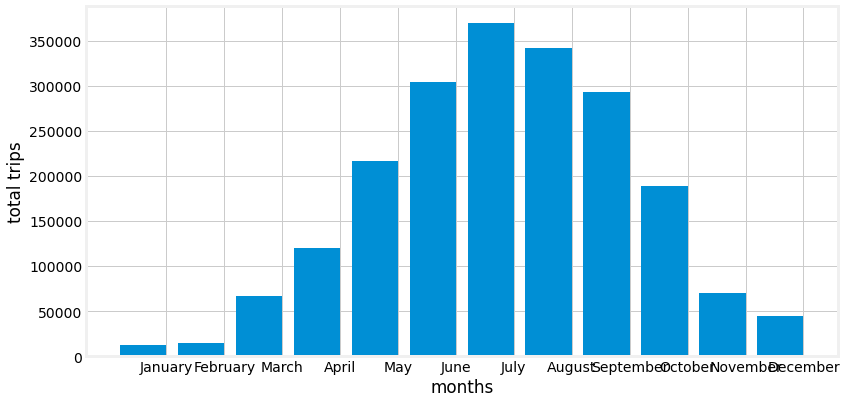

In [148]:
# plotting the total monthly rides against the months

fig, ax = plt.subplots(figsize=(12,6), facecolor='white')
 
ax.bar(total_monthly_rides.month_id, total_monthly_rides.total_rides)
ax.set_xticks([x+0.4 for x in total_monthly_rides.month_id])
ax.set_xticklabels(total_monthly_rides.index)
ax.set_facecolor('white')
ax.set_xlabel('months')
ax.set_ylabel('total trips')

<AxesSubplot:ylabel='total_ride'>

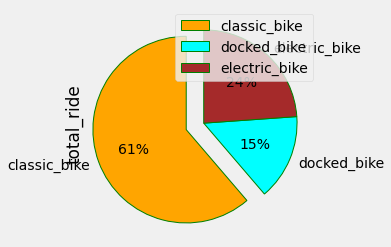

In [172]:
# understanding bike type usage among casual customers

casual = bikes['customer_type'] == "casual"
casual_riders = bikes[casual]
total_monthly_rides = casual_riders.groupby('bike_type').agg(total_ride=('start_date','count')).reset_index()

  
# Creating explode data

explode = (0.1, 0.1, 0.0,)
 
# Creating color parameters

colors = ( "orange", "cyan", "brown")
 
# Wedge properties

wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Plotting the pie chart for above dataframe
total_monthly_rides.groupby(['bike_type']).sum().plot(
    kind='pie', y='total_ride', 
  autopct='%1.0f%%', colors=colors, explode=myexplode, startangle = 90, wedgeprops = wp)


#### CONCLUSION

My analysis shows that there is an average increase in ride duration of casual riders during the weekends with Sunday recording the highest average duration of over 35 minutes. Secondly, Summer accounts for the period with the most number of rides by casual riders. July witnessed the highest total number of rides with 369415 total number of rides. December, January and February had individul ride totals ofbelow 50000. Finally,the most popular bike type among casual riders is the classic bike while the least popular is docked bike a 15%total usage

#### RECOMMENDATION 

My recommendation to the Cyclistic marketing team is that coversion campaigns should focus on creating promos for annual memberships during weekends and also Summer periods. Additionally, there should an emphasis for promos on classic bikes as most casual riders (61%) opt for this bike type.

**THANK YOU**